<a href="https://colab.research.google.com/github/yashwanth-kokkanti/simpleLoanPredictionProblem/blob/main/loanPredictionProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Simple loan prediction problem for practise 


### Problem Statement

''' Data is collected from a Financ Company which deals in home loans. Comapny wants to automate the checking of loan eligibility process 
    based on consumer data provided during filling forms. These details include Gender, Marital Status, Education, Number of Dependants, 
    Income, Loan amount, credit History etc. 

    - Its a binary classification problem whether loan would be approved or not. ''' 





' Data is collected from a Financ Company which deals in home loans. Comapny wants to automate the checking of loan eligibility process \n    based on consumer data provided during filling forms. These details include Gender, Marital Status, Education, Number of Dependants, \n    Income, Loan amount, credit History etc. \n\n    - Its a binary classification problem whether loan would be approved or not. '

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline


In [3]:
train = pd.read_csv('/content/train_ctrUa4K.csv')
test = pd.read_csv('/content/test_lAUu6dG.csv')

train_original = train.copy()
test_original = test.copy()

In [4]:
## Few insights about Data 

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape, test.shape

((614, 13), (367, 12))

In [7]:
## Univariate analysis 

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

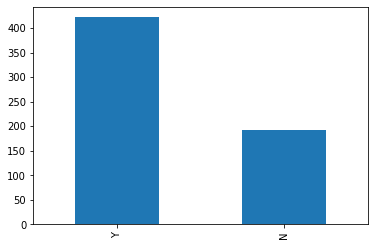

In [9]:
train['Loan_Status'].value_counts().plot.bar()

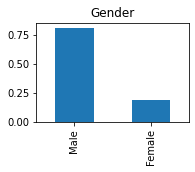

In [10]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar( title='Gender')

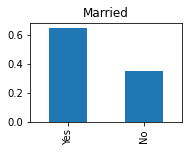

In [11]:
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar( title='Married')

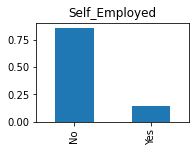

In [12]:
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

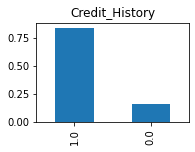

In [13]:
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [14]:
## It represents that 80% of the applicants are Male 
## 65% applicants are married 
## 15% of applicants are self_employed
## 85% of applicants have repayed their debts 

plt.figure

<function matplotlib.pyplot.figure>

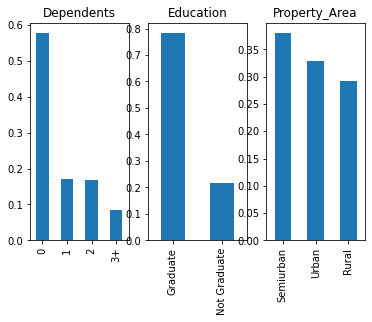

In [15]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

In [16]:
## Most of the applicants dont have Depedents
## Around 80% are Graduates
## Most of the applicants are from semi-urban areas 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


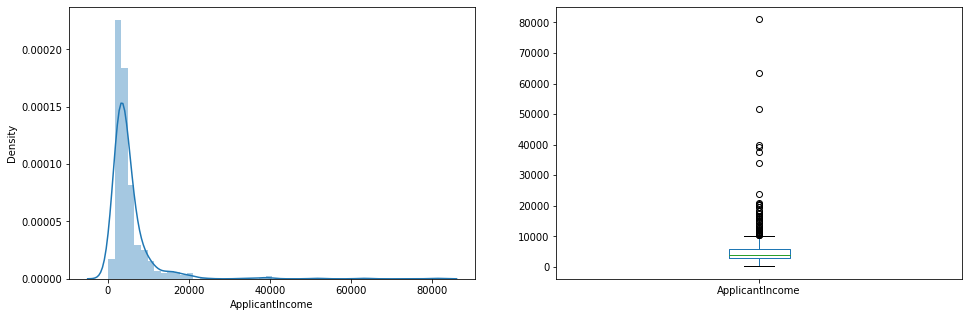

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

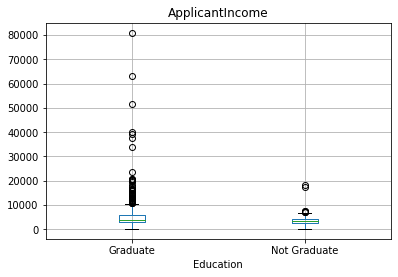

In [18]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


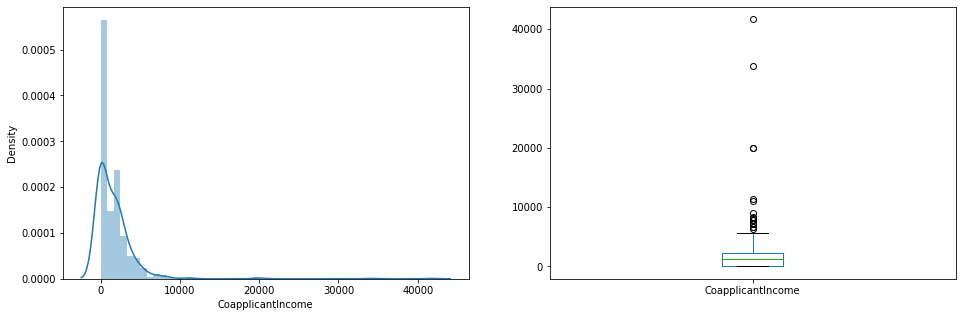

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


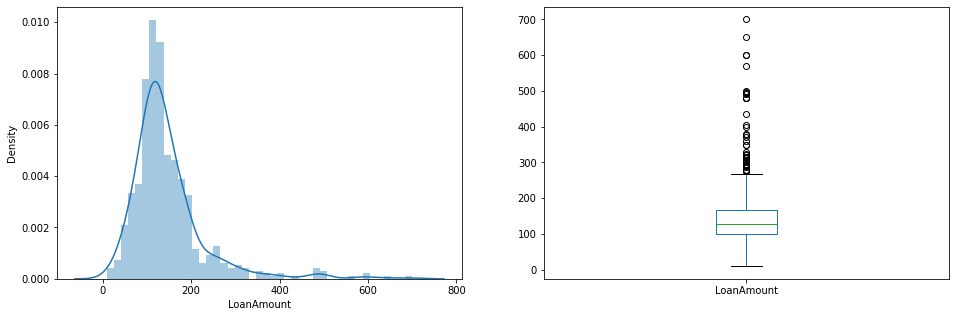

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

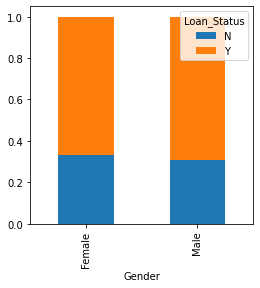

In [21]:
### BiVariate Analysis 

## First let us find the relation between categorical and target variables 

Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

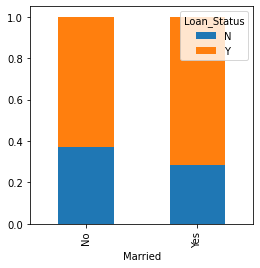

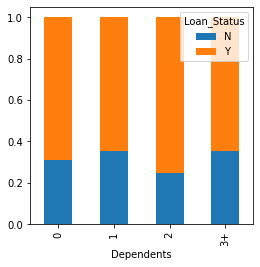

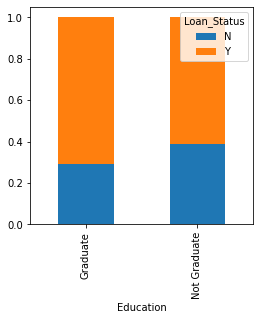

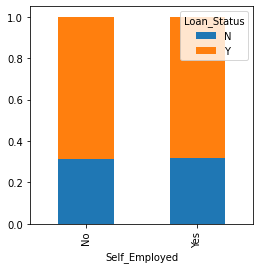

In [22]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

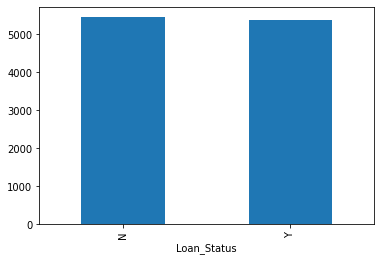

In [23]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [24]:
## Lets Drop Bins which will change 3+ in dependents to 3 to make it numerical value 
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)


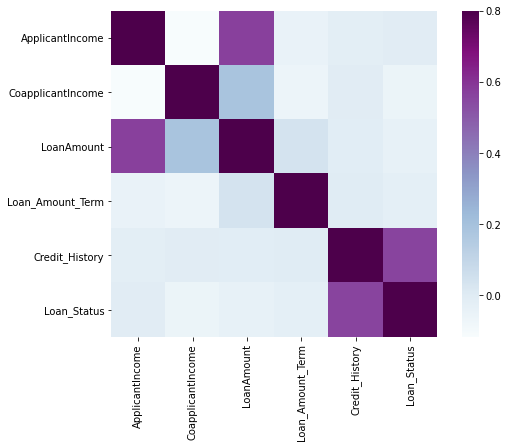

In [25]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='BuPu')

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [27]:
### Missing Value Imputation 

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
## For Numerical Variables imputation is Mean or Median 
## For Categorical Variables Imputation is mode 

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)



In [29]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
## 360 appears most of the time. 
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [31]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
## in Test Data 

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
#test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [34]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

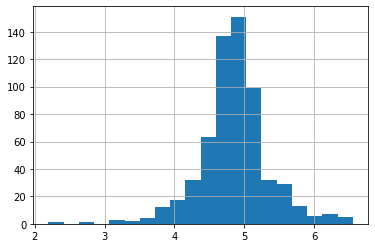

In [35]:
### Treating Outliers 

train['LoanAmount_Log'] = np.log(train['LoanAmount']) ## Log Transformation As Loan Amount has long right tail right skewed 
train['LoanAmount_Log'].hist(bins=20)

test['LoanAmount_Log'] = np.log(test['LoanAmount'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4af5bacb70>,
      dtype=object)

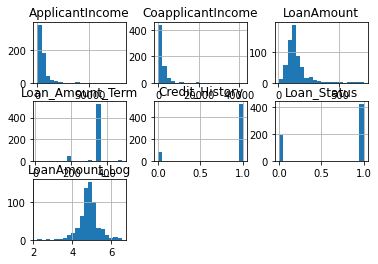

In [36]:
train.hist(bins=20)

In [37]:
### Building Model 

train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status



In [38]:
X = pd.get_dummies(X) ## One hot encoding for Gender Column converts male and female to 0, 1

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [39]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_Log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_cv = model.predict(x_cv)

In [43]:
accuracy_score(y_cv, pred_cv)

0.8108108108108109

In [44]:
accuracy_score(pred_cv, y_cv) ## Just checking if we alter the dataset what could be the result

0.8108108108108109

In [45]:
pred_test = model.predict(test)


In [46]:
## Logistic Regression Using stratified k - Folds cross validation 

from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
  print ('\n {} of kfold {}'.format(i, kf.n_splits) )
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y.loc[train_index], y.loc[test_index]
  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test[:185])
  print ('accuracy_Score', score)
  i += 1
  pres_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, 1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 1 of kfold 5
accuracy_Score 0.8048780487804879

 2 of kfold 5
accuracy_Score 0.8373983739837398

 3 of kfold 5
accuracy_Score 0.7804878048780488

 4 of kfold 5
accuracy_Score 0.7886178861788617

 5 of kfold 5
accuracy_Score 0.7950819672131147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


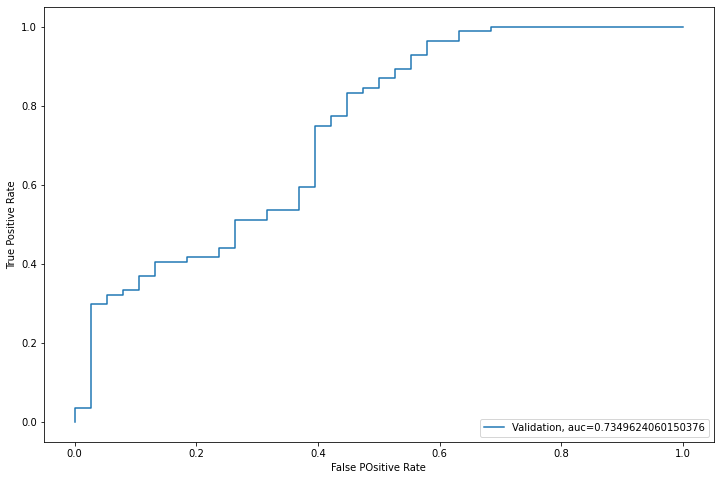

In [47]:
## Let us plot ROC - AUC Curve 

from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='Validation, auc='+str(auc))
plt.xlabel('False POsitive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [48]:
## AUC Value of 73% 

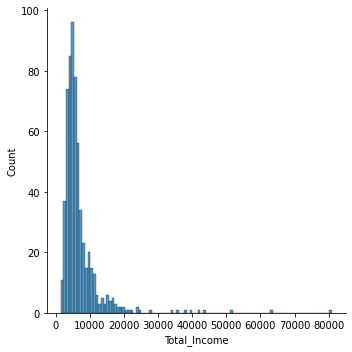

In [49]:
## More Feature Engineering

## Combine Applicant and CoApplicant Income as the chances of approval are more 
## EMI can be calculated using ratio of loan amount with respect to loan amount term
## Balance Income: Income left after EMI payment. if more income after EMI deduction then approval is easy

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

sns.displot(train['Total_Income'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


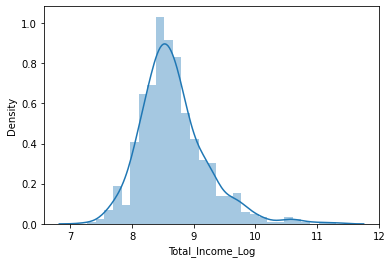

In [50]:
train['Total_Income_Log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log'])
test['Total_Income_Log'] = np.log(test['Total_Income'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


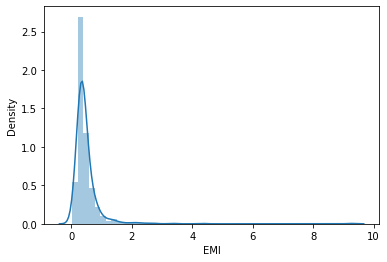

In [51]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

sns.distplot(train['EMI'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


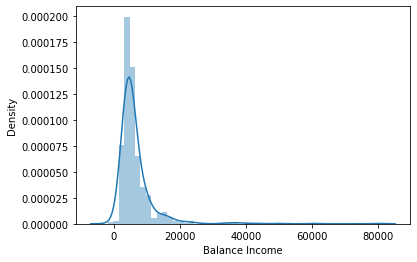

In [52]:
train['Balance Income'] = train['Total_Income'] - (train ['EMI'] * 1000)  ## Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income'] - (test ['EMI'] * 1000)

sns.distplot(train['Balance Income'])

In [53]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [54]:
### Build model using Various Models 

X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [57]:
## Logistic Regression 
i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
  print('\n {} of kfold {} '.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy_score', score)
  i += 1
  
  pres_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, 1]



 1 of kfold 5 
accuracy_score 0.7886178861788617

 2 of kfold 5 
accuracy_score 0.6910569105691057

 3 of kfold 5 
accuracy_score 0.6666666666666666

 4 of kfold 5 
accuracy_score 0.7967479674796748

 5 of kfold 5 
accuracy_score 0.680327868852459


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
## Decision Tree

from sklearn import tree 

i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
  print('\n {} of kfold {} '.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr, ytr)
  
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy_score', score)
  i += 1
  
  pres_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, 1]


 1 of kfold 5 
accuracy_score 0.7398373983739838

 2 of kfold 5 
accuracy_score 0.6991869918699187

 3 of kfold 5 
accuracy_score 0.7560975609756098

 4 of kfold 5 
accuracy_score 0.7073170731707317

 5 of kfold 5 
accuracy_score 0.6721311475409836


In [66]:
## RandomForest 

from sklearn.ensemble import RandomForestClassifier

i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
  print('\n {} of kfold {} '.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = RandomForestClassifier(random_state=1, max_depth=6)
  model.fit(xtr, ytr)
  
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy_score', score)
  i += 1
  
  pres_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, 1]


 1 of kfold 5 
accuracy_score 0.8292682926829268

 2 of kfold 5 
accuracy_score 0.8373983739837398

 3 of kfold 5 
accuracy_score 0.7804878048780488

 4 of kfold 5 
accuracy_score 0.7804878048780488

 5 of kfold 5 
accuracy_score 0.7868852459016393


In [68]:
## Use GridSearchCV 

from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth':list(range(1, 20, 2)), 'n_estimators':list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

grid_search.fit(x_train, y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [69]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=41,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [70]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 41}

In [71]:
## XGBoost

from xgboost import XGBClassifier

i=1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
  print('\n {} of kfold {} '.format(i, kf.n_splits))
  xtr, xvl = X.loc[train_index], X.loc[test_index]
  ytr, yvl = y[train_index], y[test_index]

  model = XGBClassifier(random_state=1, max_depth=6)
  model.fit(xtr, ytr)
  
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl, pred_test)

  print('accuracy_score', score)
  i += 1
  
  pres_test = model.predict(test)
  pred = model.predict_proba(xvl)[:, 1]


 1 of kfold 5 
accuracy_score 0.7886178861788617

 2 of kfold 5 
accuracy_score 0.7398373983739838

 3 of kfold 5 
accuracy_score 0.8048780487804879

 4 of kfold 5 
accuracy_score 0.7804878048780488

 5 of kfold 5 
accuracy_score 0.7377049180327869
